In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n = 100
N = 10000

In [3]:
def sample():
    arr = []
    for i in range(10000):
        # Choose a random number between 0 and 1, called randnum
        randnum = np.random.random()
        # If randnum < 100/10000, then we add i to the array; else, discard i
        if randnum < 0.01:
            arr.append(i)
    return len(arr)

In [4]:
sizes = []
for k in range(100):
    sizes.append(sample())

In [5]:
print(sizes)

[98, 100, 83, 82, 108, 92, 100, 105, 112, 91, 102, 85, 107, 99, 115, 102, 110, 82, 99, 93, 116, 92, 96, 114, 94, 88, 96, 93, 85, 91, 104, 93, 90, 85, 122, 89, 119, 107, 93, 103, 100, 94, 113, 82, 117, 105, 105, 101, 103, 95, 103, 104, 113, 75, 82, 114, 69, 97, 99, 104, 94, 104, 90, 107, 93, 103, 96, 102, 104, 98, 110, 97, 85, 108, 101, 92, 91, 115, 96, 98, 99, 110, 134, 111, 100, 100, 101, 98, 94, 98, 90, 118, 99, 112, 109, 87, 113, 101, 85, 105]


In [6]:
d = [[x, sizes.count(x)] for x in set(sizes)]
df = pd.DataFrame(d)

In [7]:
df.columns = ['Number of Units in Samples', 'Number of Samples']
df

,Number of Units in Samples,Number of Samples
0,134,1
1,69,1
2,75,1
3,82,4
4,83,1
5,85,5
6,87,1
7,88,1
8,89,1
9,90,3


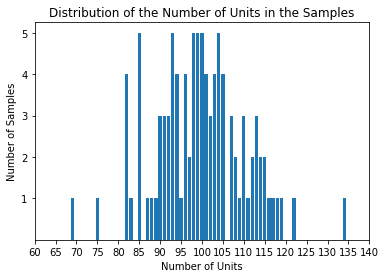

In [8]:
plt.bar(df.iloc[:,0], df.iloc[:,1])
plt.xticks(np.arange(60, 141, 5))
plt.yticks(np.arange(df.iloc[:,1].min(), df.iloc[:,1].max()+1, 1))
plt.title("Distribution of the Number of Units in the Samples")
plt.xlabel("Number of Units")
plt.ylabel("Number of Samples")
plt.show()

In simple random sampling, sample mean is an unbiased estimator of the population mean.

First, the expected value of the sample mean is $E(\bar{y})=\sum_{s} \overline{y_{s}} P(s)$ where the summation is over all possible samples $s$ of size $n$, and $P(s)$ is the probability of $s$ being selected, which is $\binom{N}{n}$. Then,
\begin{align*}
E(\bar{y}) &=\sum_{s} \overline{y_{s}} P(s)\\
&= \sum_s \frac{1}{n} (y_{s_1}+\cdots y_{s_n}) P(s)\\
&= \sum_s \frac{1}{n} (y_{s_1}+\cdots y_{s_n}) \frac{1}{\binom{N}{n}}.
\end{align*}
Since each unit in the population can be in $\binom{N-1}{n-1}$ distinct samples of size $n$, each $y_i$ appears $\binom{N-1}{n-1}$ times in the above sum. Then,
\begin{align*}
\sum_s \frac{1}{n} (y_{s_1}+\cdots y_{s_n}) \frac{1}{\binom{N}{n}} &= \sum_{i=1}^N\frac{1}{n}\frac{\binom{N-1}{n-1}}{\binom{N}{n}} y_i\\
&= \sum_{i=1}^N \frac{1}{n}\frac{n}{N} y_i\\
&= \frac{1}{N} \sum_{i=1}^N y_i
\end{align*}
so we conclude that the expected value of the sample mean is equal to the population mean. This shows that the sample mean is an unbiased estimator of the population mean.

In simple random sampling, obtaining an unbiased estimator of the population sum $\tau=\sum_{i=1}^N y_i$ can be done as follows.

Let $\bar{\tau}=N\bar{y}$ be the estimator for the population sum, where $\bar{y}$ is the sample mean. Then $E(\bar{\tau})=E(N\bar{y})=N\cdot E(\bar{y})=N\mu=N\cdot\frac{1}{N}(y_1+\cdots+y_N)=\sum_{i=1}^N y_i=\tau$. Therefore, it is an unbiased estimator.

### Implementation of the Huntington-Hill method

In [9]:
import math

In [10]:
def argmax(arr):
    return max(enumerate(arr), key=lambda x: x[1])[0]

In [11]:
def huntington_hill(group_sizes, sample_size):
    """
    group_sizes is a list of group sizes
    sample_size is the total number of samples (sum of the number of samples from each 
    of the groups)
    """
    n = len(group_sizes) # number of groups
    total_popl = sum(group_sizes) # total population size
    
    # if sample_size is less than the number of groups, this method is not applicable
    if sample_size < n:
        return [0]*n
    
    # start by assigning 1 sample to each group
    allocated = [1]*n
    
    # calculate the quotient for each group, and then assign 1 sample to the group with
    # the highest quotient
    quotients = [1]*n
    counter = 0
    while sample_size > sum(allocated):

        for i in range(n):
            q = group_sizes[i]/math.sqrt(allocated[i]*(allocated[i]+1))
            quotients[i] = q
        max_index = argmax(quotients)
        allocated[max_index] += 1
        counter += 1
        print("Allocation after {} iteration:".format(counter), allocated)
    return allocated

In [12]:
huntington_hill([84,9,7], 10)

Allocation after 1 iteration: [2, 1, 1]
Allocation after 2 iteration: [3, 1, 1]
Allocation after 3 iteration: [4, 1, 1]
Allocation after 4 iteration: [5, 1, 1]
Allocation after 5 iteration: [6, 1, 1]
Allocation after 6 iteration: [7, 1, 1]
Allocation after 7 iteration: [8, 1, 1]


[8, 1, 1]

### Diabetes Dataset

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# using sample rate 5%
N = df.shape[0]
n = int(N*0.05)
s = df['Outcome'].sample(n, random_state=1)
y_bar = s.mean()
diff = s - y_bar
diff = diff**2
s_squared = diff.sum()/(n-1)
ci = 1.687*math.sqrt((N-n)*s_squared/(N*n)) 
print("For sample rate 5%")
print("Estimated mean and 95% confidence interval:", y_bar, "+/-", ci)

For sample rate 5%
Estimated mean and 95% confidence interval: 0.34210526315789475 +/- 0.12827827892172955


In [16]:
# using sample rate 10%
N = df.shape[0]
n = int(N*0.1)
s = df['Outcome'].sample(n, random_state=1)
y_bar = s.mean()
diff = s - y_bar
diff = diff**2
s_squared = diff.sum()/(n-1)
ci = 1.687*math.sqrt((N-n)*s_squared/(N*n)) 
print("For sample rate 10%")
print("Estimated mean and 95% confidence interval:", y_bar, "+/-", ci)

For sample rate 10%
Estimated mean and 95% confidence interval: 0.3684210526315789 +/- 0.08919549709089974


### Attribute: Pregnancies

In [17]:
stratified_pregnancies = df.groupby('Pregnancies').apply(lambda x: x.sample(
    frac=0.1, random_state=22))
stratified_pregnancies.drop(stratified_pregnancies.columns[[1,2,3,4,5,6,7]],axis=1,inplace=True)
stratified_pregnancies

Pregnancies  Outcome
Pregnancies                          
0           45             0        1
            536            0        0
            465            0        0
            528            0        0
            445            0        1
...                      ...      ...
10          542           10        1
            306           10        1
11          193           11        1
12          745           12        0
13          86            13        0

[77 rows x 2 columns]

In [18]:
stratified_pregnancies['Outcome'].mean()

0.3116883116883117

### Attribute: Glucose

In [19]:
stratified_glucose = df.groupby(pd.cut(df['Glucose'], np.arange(0,df['Glucose'].max()+10,10
    ))).apply(lambda x: x.sample(frac=0.1, random_state=22))
stratified_glucose.drop(stratified_glucose.columns[[0,2,3,4,5,6,7]],axis=1,inplace=True)
stratified_glucose

Glucose  Outcome
Glucose                         
(60, 70]   352       61        0
(70, 80]   570       78        0
           494       80        0
           589       73        0
(80, 90]   532       86        0
...                 ...      ...
(170, 180] 716      173        1
(180, 190] 546      187        1
           360      189        1
(190, 200] 319      194        1
           206      196        1

[77 rows x 2 columns]

In [20]:
stratified_glucose['Outcome'].mean()

0.38961038961038963

### Attribute: BloodPressure

In [21]:
stratified_bp = df.groupby(pd.cut(df['BloodPressure'], 
                np.arange(0,df['BloodPressure'].max()+10,10))).apply(
                lambda x: x.sample(frac=0.1, random_state=22))
stratified_bp.drop(stratified_bp.columns[[0,1,3,4,5,6,7]],axis=1,inplace=True)
stratified_bp

BloodPressure  Outcome
BloodPressure                            
(40, 50]      356             50        1
              258             50        0
(50, 60]      650             54        0
              127             58        0
              256             56        0
...                          ...      ...
(80, 90]      21              84        0
              600             88        0
(90, 100]     622             94        0
              616             96        0
(100, 110]    177            110        1

[72 rows x 2 columns]

In [22]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [23]:
stratified_bp['Outcome'].mean()

0.3333333333333333

### Attribute: Age

In [24]:
stratified_age = df.groupby(pd.cut(df['Age'], 
                np.arange(0,df['Age'].max()+10,10))).apply(
                lambda x: x.sample(frac=0.1, random_state=22))
stratified_age.drop(stratified_age.columns[[0,1,2,3,4,5,6]],axis=1,inplace=True)
stratified_age

Age  Outcome
Age                       
(20, 30] 102   21        0
         496   30        0
         90    21        0
         705   28        0
         139   28        0
...           ...      ...
(50, 60] 475   59        0
         734   53        0
         93    60        1
(60, 70] 582   62        0
         579   62        1

[76 rows x 2 columns]

In [25]:
stratified_age['Outcome'].mean()

0.32894736842105265

### Analysis of results

The estimated mean calculated in part 1 using sample rate 10% was 0.3684. The attribute that provided the closest estimate was Glucose, which was 0.3896. Computing the variance for each stratum of the attributes pregnancies, glucose, blood pressure, and age, we obtain the data shown below.

Glucose has low variance in each stratum, all of them being less than 0.255. All other attributes have strata with variance higher than 0.255. This shows that stratification using the glucose attribute provides the best estimate out of the four attributes considered in this problem, since the values in each stratum are more similar to each other. Plotting the mean of each stratum, we also see that the attribute with the highest correlation with diabetes is glucose, as its correlation is approximately linear (shown below).

### Pregnancies

In [26]:
grouped_p = df.drop(df.columns[[1,2,3,4,5,6,7]],axis=1,inplace=False).groupby('Pregnancies')

In [27]:
# number of units in each stratum
grouped_p.size()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

In [28]:
grouped_p['Outcome'].agg(["mean", "var"]).reset_index()

,Pregnancies,mean,var
0,0,0.342342,0.227191
1,1,0.214815,0.169928
2,2,0.184466,0.151913
3,3,0.360000,0.233514
4,4,0.338235,0.227173
5,5,0.368421,0.236842
6,6,0.320000,0.222041
7,7,0.555556,0.252525
8,8,0.578947,0.250356
9,9,0.642857,0.238095


In [29]:
grouped_p['Outcome'].agg("var").sum()

3.273301858487499

<AxesSubplot:xlabel='Pregnancies'>

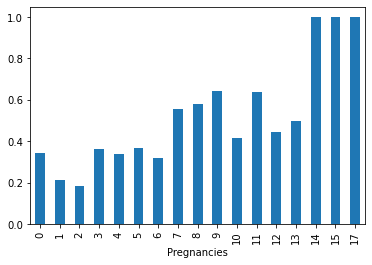

In [30]:
grouped_p['Outcome'].agg("mean").dropna().plot.bar()

### Glucose

In [31]:
grouped_g = df.drop(df.columns[[0,2,3,4,5,6,7]],axis=1,inplace=False).groupby(
    pd.cut(df['Glucose'], np.arange(0,df['Glucose'].max()+10,10)))

In [32]:
# number of units in each stratum
grouped_g.size()

Glucose
(0, 10]         0
(10, 20]        0
(20, 30]        0
(30, 40]        0
(40, 50]        1
(50, 60]        3
(60, 70]        7
(70, 80]       31
(80, 90]       68
(90, 100]      99
(100, 110]    106
(110, 120]     99
(120, 130]     98
(130, 140]     59
(140, 150]     52
(150, 160]     39
(160, 170]     32
(170, 180]     28
(180, 190]     24
(190, 200]     17
dtype: int64

In [33]:
grouped_g['Outcome'].agg(["mean", "var"]).reset_index()

,Glucose,mean,var
0,"(0, 10]",NaN,NaN
1,"(10, 20]",NaN,NaN
2,"(20, 30]",NaN,NaN
3,"(30, 40]",NaN,NaN
4,"(40, 50]",0.000000,NaN
5,"(50, 60]",0.000000,0.000000
6,"(60, 70]",0.000000,0.000000
7,"(70, 80]",0.064516,0.062366
8,"(80, 90]",0.073529,0.069140
9,"(90, 100]",0.111111,0.099773


In [34]:
# variance
grouped_g['Outcome'].agg("var").sum()

2.210916916452024

<AxesSubplot:xlabel='Glucose'>

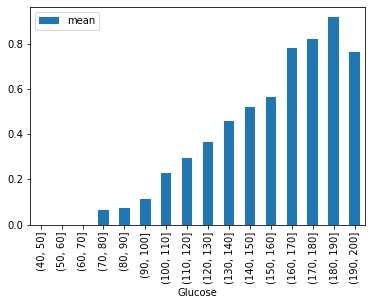

In [35]:
grouped_g['Outcome'].agg(["mean"]).dropna().plot.bar()

### BloodPressure

In [36]:
grouped_b = df.drop(df.columns[[0,1,3,4,5,6,7]],axis=1,inplace=False).groupby(
    pd.cut(df['BloodPressure'], np.arange(0,df['BloodPressure'].max()+10,10)))

In [37]:
# number of units in each stratum
grouped_b.size()

BloodPressure
(0, 10]         0
(10, 20]        0
(20, 30]        3
(30, 40]        2
(40, 50]       24
(50, 60]       94
(60, 70]      217
(70, 80]      228
(80, 90]      127
(90, 100]      25
(100, 110]     11
(110, 120]      1
(120, 130]      1
dtype: int64

In [38]:
# mean and variance for each stratum
grouped_b.agg(["mean", "var"]).reset_index()

BloodPressure                          Outcome          
                        mean        var      mean       var
0        (0, 10]         NaN        NaN       NaN       NaN
1       (10, 20]         NaN        NaN       NaN       NaN
2       (20, 30]   28.000000  12.000000  0.333333  0.333333
3       (30, 40]   39.000000   2.000000  0.500000  0.500000
4       (40, 50]   48.250000   5.326087  0.250000  0.195652
5       (50, 60]   57.297872   7.953329  0.159574  0.135553
6       (60, 70]   66.387097   8.367981  0.322581  0.219534
7       (70, 80]   75.833333   7.637298  0.359649  0.231316
8       (80, 90]   85.732283   8.102362  0.464567  0.250719
9      (90, 100]   94.920000   7.660000  0.400000  0.250000
10    (100, 110]  106.727273   7.418182  0.636364  0.254545
11    (110, 120]  114.000000        NaN  1.000000       NaN
12    (120, 130]  122.000000        NaN  0.000000       NaN

In [39]:
grouped_b['Outcome'].agg("var").sum()

2.3706523531883956

<AxesSubplot:xlabel='BloodPressure'>

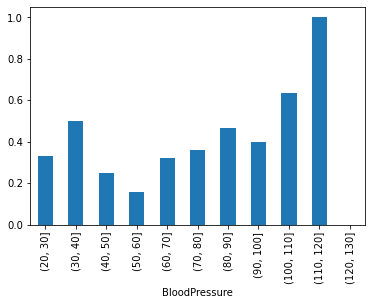

In [40]:
grouped_b['Outcome'].agg("mean").dropna().plot.bar()

### Age

In [41]:
# number of units in each stratum
grouped_a = df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=False).groupby(
    pd.cut(df['Age'], np.arange(0,df['Age'].max()+10,10)))

In [42]:
grouped_a.size()

Age
(0, 10]       0
(10, 20]      0
(20, 30]    417
(30, 40]    157
(40, 50]    113
(50, 60]     54
(60, 70]     25
(70, 80]      1
(80, 90]      1
dtype: int64

In [43]:
# mean and variance for each stratum
grouped_a['Outcome'].agg(["mean", "var"]).reset_index()

,Age,mean,var
0,"(0, 10]",NaN,NaN
1,"(10, 20]",NaN,NaN
2,"(20, 30]",0.215827,0.169653
3,"(30, 40]",0.484076,0.251347
4,"(40, 50]",0.566372,0.247788
5,"(50, 60]",0.574074,0.249126
6,"(60, 70]",0.280000,0.210000
7,"(70, 80]",0.000000,NaN
8,"(80, 90]",0.000000,NaN


In [44]:
grouped_a['Outcome'].agg("var").sum()

1.1279142136779086

<AxesSubplot:xlabel='Age'>

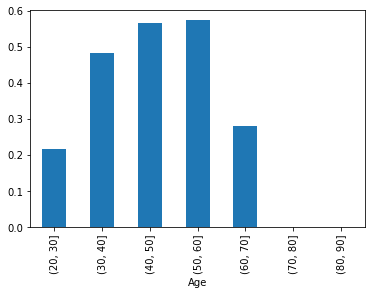

In [45]:
grouped_a['Outcome'].agg("mean").dropna().plot.bar()

### Attribute: Pregnancies

In [46]:
bp = df.groupby(pd.cut(df['BloodPressure'], 
                np.arange(0,df['BloodPressure'].max(),10)))
bp

In [47]:
grouped_p = df.drop(df.columns[[1,2,3,4,5,6,7]],axis=1,inplace=False).groupby('Pregnancies')

In [48]:
# randomly select 3 primary units
rand = np.random.choice(df['Pregnancies'].max()+1, size=3, replace=False)
rand

array([8, 6, 9])

In [49]:
count = 0
num_samples = 0
for i in rand:
    count += grouped_p.get_group(i)['Outcome'].sum()
    num_samples += len(grouped_p.get_group(i))
print("Mean:", count/num_samples)

Mean: 0.4827586206896552


### Attribute: Glucose

In [50]:
grouped_g = df.drop(df.columns[[0,2,3,4,5,6,7]],axis=1,inplace=False).groupby(
    pd.cut(df['Glucose'], np.arange(0,df['Glucose'].max()+10,10)))

In [51]:
# randomly select 3 primary units
nonempty_group_keys = []
for k in grouped_g.groups.keys():
    if len(grouped_g.groups.get(k)):
        nonempty_group_keys.append(k)
rand = np.random.choice(nonempty_group_keys, size=3, replace=False)
rand

array([Interval(40, 50, closed='right'),
       Interval(160, 170, closed='right'),
       Interval(180, 190, closed='right')], dtype=object)

In [52]:
count = 0
num_samples = 0
for k in rand:
    count += grouped_g.get_group(k)['Outcome'].sum()
    num_samples += len(grouped_g.get_group(k))
print("Mean:", count/num_samples)

Mean: 0.8245614035087719


### Attribute: BloodPressure

In [53]:
grouped_b = df.drop(df.columns[[0,1,3,4,5,6,7]],axis=1,inplace=False).groupby(
    pd.cut(df['BloodPressure'], np.arange(0,df['BloodPressure'].max()+10,10)))

In [54]:
# randomly select 3 primary units
nonempty_group_keys = []
for k in grouped_b.groups.keys():
    if len(grouped_b.groups.get(k)):
        nonempty_group_keys.append(k)
rand = np.random.choice(nonempty_group_keys, size=3, replace=False)
rand

array([Interval(120, 130, closed='right'),
       Interval(40, 50, closed='right'), Interval(30, 40, closed='right')],
      dtype=object)

In [55]:
count = 0
num_samples = 0
for k in rand:
    count += grouped_b.get_group(k)['Outcome'].sum()
    num_samples += len(grouped_b.get_group(k))
print("Mean:", count/num_samples)

Mean: 0.25925925925925924


### Attribute: Age

In [56]:
grouped_a = df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=False).groupby(
    pd.cut(df['Age'], np.arange(0,df['Age'].max()+10,10)))

In [57]:
# randomly select 3 primary units
nonempty_group_keys = []
for k in grouped_a.groups.keys():
    if len(grouped_a.groups.get(k)):
        nonempty_group_keys.append(k)
rand = np.random.choice(nonempty_group_keys, size=3, replace=False)
rand

array([Interval(70, 80, closed='right'), Interval(40, 50, closed='right'),
       Interval(60, 70, closed='right')], dtype=object)

In [58]:
count = 0
num_samples = 0
for k in rand:
    count += grouped_a.get_group(k)['Outcome'].sum()
    num_samples += len(grouped_a.get_group(k))
print("Mean:", count/num_samples)

Mean: 0.5107913669064749


### Analysis of Results

Blood pressure gave the best estimate in this run, with the estimate closest to the value calculated in part 1. However, it should be noted that different runs sometimes gave different results for which attribute is the best. Since blood pressure does have higher per-stratum variance than other attributes, one of the values being as high as 0.5, the units in each stratum are not necessarily very similar to each other. This gives a less-skewed sample when performing cluster sampling by dividing the data into primary units according to blood pressure.